In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
df = pd.read_csv('Dummy_data.csv')
presentation = df.tail(20)
df = df.drop(df.tail(20).index)
X = df.drop(['customerid','churn_Yes'], axis = 1)
y = df[['churn_Yes']]

,customerid,tenure,monthlycharges,totalcharges,gender_Male,seniorcitizen_Yes,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_Yes,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,34,56.95,1889.50,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0


In [3]:
X = df.drop(['customerid','churn_Yes'], axis = 1)
y = df[['churn_Yes']]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify = y)

In [8]:
'''from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)'''

In [9]:
# Balancing the data
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=3, sampling_strategy = 'minority')
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_resampled).items()))

[('churn_Yes', 1)]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:
regressor = LogisticRegression()
regressor.fit(X_resampled, y_resampled.values.ravel())
print(regressor.score(X_resampled, y_resampled))
print(regressor.score(X_test, y_test))

0.7624240750966317
0.7453857075248462


In [12]:
score = regressor.score(X_test, y_test)
score

0.7453857075248462

In [13]:
prediction_test = regressor.predict(X_test)
prediction_test.shape

(2113,)

In [14]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction_test)


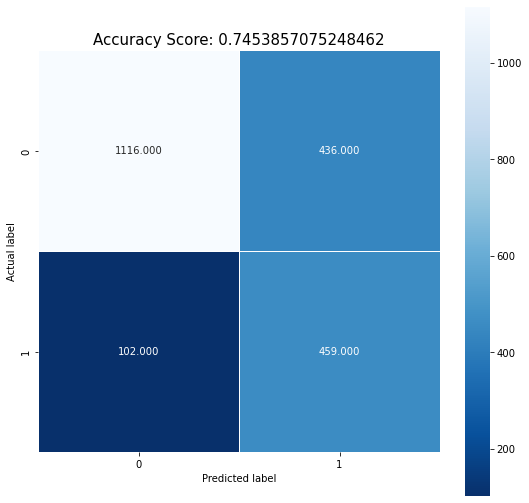

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

AxesSubplot(0.125,0.125;0.775x0.755)


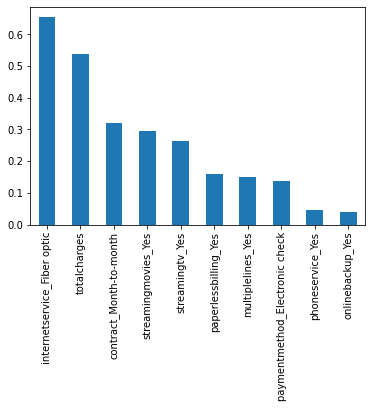

In [16]:
# To get the weights of all the variables
weights = pd.Series(regressor.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


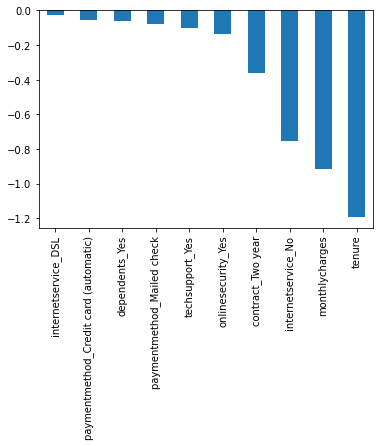

In [17]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [18]:
'''Recall this is a classification problem with classes 0 and 1. 
Notice that the coefficients are both positive and 
negative. The positive scores indicate a feature that predicts class 1, 
whereas the negative scores indicate a feature that predicts class 0'''

'Recall this is a classification problem with classes 0 and 1. \nNotice that the coefficients are both positive and \nnegative. The positive scores indicate a feature that predicts class 1, \nwhereas the negative scores indicate a feature that predicts class 0'

Feature:tenure,
 Score: -1.19506 

Feature:monthlycharges,
 Score: -0.91489 

Feature:totalcharges,
 Score: 0.53869 

Feature:gender_Male,
 Score: 0.02136 

Feature:seniorcitizen_Yes,
 Score: 0.03734 

Feature:partner_Yes,
 Score: 0.00931 

Feature:dependents_Yes,
 Score: -0.06030 

Feature:phoneservice_Yes,
 Score: 0.04448 

Feature:multiplelines_Yes,
 Score: 0.15109 

Feature:onlinesecurity_Yes,
 Score: -0.13510 

Feature:onlinebackup_Yes,
 Score: 0.03842 

Feature:deviceprotection_Yes,
 Score: 0.00959 

Feature:techsupport_Yes,
 Score: -0.09983 

Feature:streamingtv_Yes,
 Score: 0.26239 

Feature:streamingmovies_Yes,
 Score: 0.29672 

Feature:paperlessbilling_Yes,
 Score: 0.15859 

Feature:internetservice_DSL,
 Score: -0.02929 

Feature:internetservice_Fiber optic,
 Score: 0.65357 

Feature:internetservice_No,
 Score: -0.75499 

Feature:contract_Month-to-month,
 Score: 0.32093 

Feature:contract_One year,
 Score: -0.01358 

Feature:contract_Two year,
 Score: -0.35896 

Feature:payme

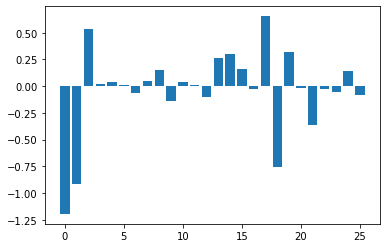

In [19]:
# get importance
importance = regressor.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    name = X.columns[i]
    print(f'Feature:{name},\n Score: %.5f \n' % (v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [20]:
print(regressor.score(X_resampled, y_resampled))
print(regressor.score(X_test, y_test))
print(classification_report(y_test,prediction_test))

0.7624240750966317
0.7453857075248462
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1552
           1       0.51      0.82      0.63       561

    accuracy                           0.75      2113
   macro avg       0.71      0.77      0.72      2113
weighted avg       0.81      0.75      0.76      2113



In [21]:
# k-fold cross validation evaluation

from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = LogisticRegression()
kfold = StratifiedKFold(n_splits=5)
results = cross_val_score(model, X, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\krist\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Accuracy: 80.52% (0.72%)


C:\Users\krist\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
